### Exploratory Data Analysis

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import regex as re
import emoji
import matplotlib.pyplot as plt

In [17]:
# read in data

data = pd.read_csv('./data/reddit_working_cleaned.csv')

In [18]:
# inspect scifi data - first and last five rows

data.head()
data.tail()

,created_utc,selftext,subreddit,title
47641,1421701672,how do they get the particles and find their entangled pairs i just cant imagine any way they would obtain them,askscience,How do people who study entangled particles get those particles?
47642,1417723027,the delta iv rocket isn t that new so what is actually being tested,askscience,What is the goal/purpose of the Orion test launch?
47643,1519983877,this doesn t seem to be true of all icicles especially the smaller onee but most of the large ones 30cm appear to have this ribbed affect what s causing this,askscience,Why do large icicles appear ribbed?
47644,1432885551,i know that nature only deals with the d and l isomers of saccharides and amino acids respectively but stereoisomers of such molecules can be synthesized in the lab if i walked into a r ubway and ordered a sandwich consisting of l isomer carbohydrates and with protein made of d amino acids how would it taste would i be able to metabolize any of it as a secondary question what if there were bacteria on the sandwich with dextrorotatory dna and rna who also transcribed proteins with d a...,askscience,What would happen if you tried to eat a sandwich with L-Sugars and D-Amino Acids?
47645,1491402075,i ve seen the maps of the ice sheets in north america and europe before extending roughly to 40 degrees north and it made me wonder how far the sheets extended in south america i was surprised to see that the antarctic sheet didn t even reach south america 55 degrees south,askscience,Why was the southern hemisphere ice sheet smaller than the northern hemisphere in the last glacial maximum?


#### EDA

**Most Frequent Words by Subreddit**

In [20]:
# select selftext from the askscience subreddit

science = data['selftext'][data['subreddit'] == 'askscience']

In [21]:
# select selftext from scifi subreddit

scifi = data['selftext'][data['subreddit'] == 'scifi']
type(scifi)

pandas.core.series.Series

In [22]:
# instantiate CountVectorizer
# countvectorize selftext

cv_science = CountVectorizer(max_features=20,
                     stop_words='english')
cv_science.fit_transform(science)

cv_scifi = CountVectorizer(max_features=20,
                           stop_words='english')
cv_scifi.fit_transform(scifi)

# idea taken and adapted from Dereje Workneh

<23628x20 sparse matrix of type '<class 'numpy.int64'>'
	with 80311 stored elements in Compressed Sparse Row format>

In [23]:
science_words = cv_science.get_feature_names()
print(science_words)

['different', 'does', 'don', 'earth', 'energy', 'example', 'just', 'know', 'light', 'like', 'make', 'possible', 'question', 'say', 'space', 'time', 'understand', 've', 'water', 'way']


In [24]:
scifi_words = cv_scifi.get_feature_names()
print(scifi_words)

['book', 'books', 'don', 'fi', 'good', 'just', 'know', 'like', 'new', 'people', 'read', 'really', 'sci', 'series', 'space', 'star', 'story', 'think', 'time', 've']


In [25]:
count = 0
word_set_scifi = set()
word_count_scifi = {}
for word in scifi_words:
    for text in scifi:
        count += text.count(word)
        for w in text.split():
            word_set_scifi.add(w)
    word_count_scifi[word] = count
frequency_scifi = {keys: round(values/len(word_set), 2) for (keys, values) in word_count_scifi.items()}
print(frequency_scifi)

NameError: name 'word_set' is not defined

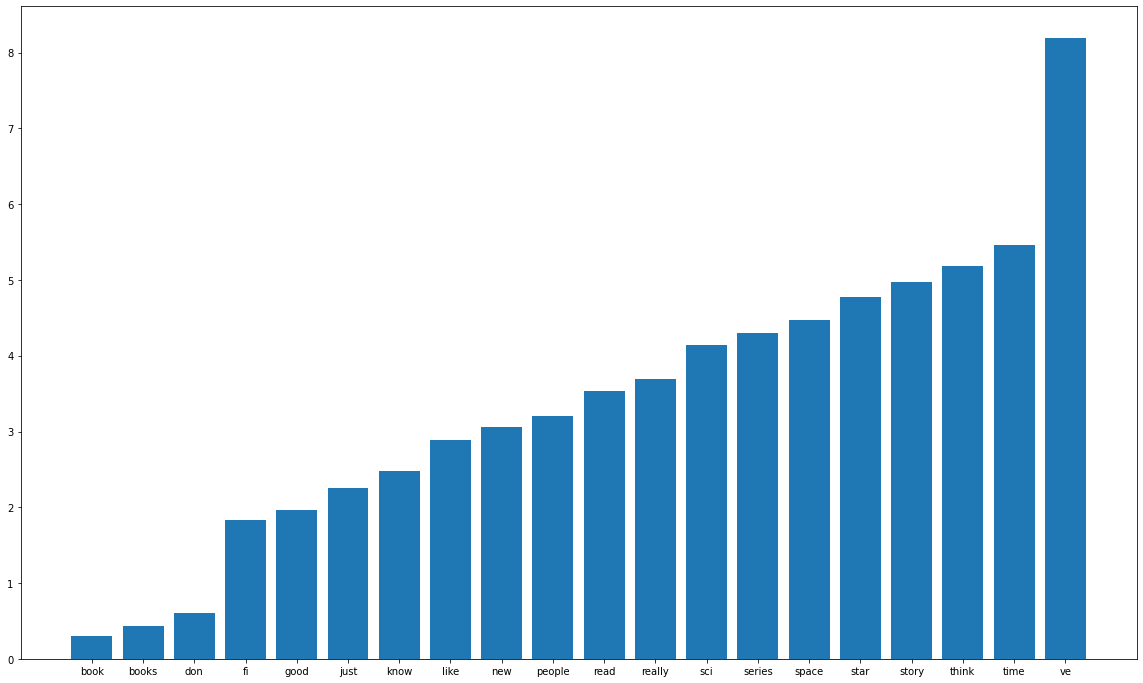

In [155]:
plt.figure(figsize= (20, 12))
plt.bar(frequency_scifi.keys(), frequency_scifi.values());


In [152]:
count = 0
word_set = set()
word_count_science = {}
for word in science_words:
    for text in science:
        count += text.count(word)
        for w in text.split():
            word_set.add(w)
    word_count_science[word] = count

frequency_science = {keys: round(values/len(word_set), 2) for (keys, values) in word_count_science.items()}
print(frequency_science)

{'different': 0.07, 'does': 0.24, 'don': 0.33, 'earth': 0.4, 'energy': 0.48, 'example': 0.53, 'just': 0.67, 'know': 0.83, 'light': 0.94, 'like': 1.11, 'make': 1.18, 'possible': 1.24, 'question': 1.38, 'say': 1.45, 'space': 1.52, 'time': 1.65, 'understand': 1.74, 've': 3.08, 'water': 3.15, 'way': 3.29}


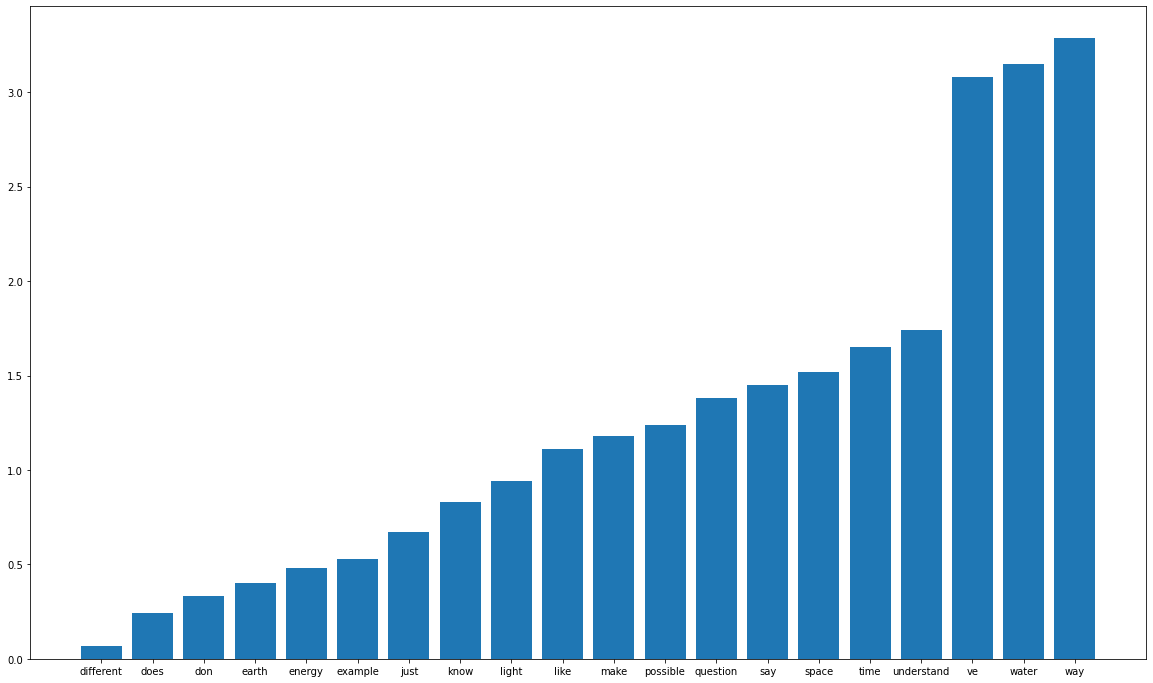

In [153]:
plt.figure(figsize= (20, 12))
plt.bar(frequency_science.keys(), frequency_science.values());
